     year    jan    feb    mar    apr    may   jun   jul   aug    sep    oct  \
0    1890  999,9  999,9  999,9  999,9  999,9  15,6  19,3  15,3    8,9    1,4   
1    1891  -27,7  -21,7   -9,8   -1,8      8  14,3  19,8  16,4    7,2   -2,8   
2    1892  -31,6  -26,6  -17,3   -1,6    7,7  15,7  17,3  14,9    7,7   -0,8   
3    1893  -32,4  -24,5   -8,1    2,9    7,1    16  18,8  14,5    7,1    0,1   
4    1894    -28  -18,4   -9,8   -0,3    9,8  14,6  18,8  14,8   10,7    0,3   
..    ...    ...    ...    ...    ...    ...   ...   ...   ...    ...    ...   
125  2015  -21,2  -15,5   -6,9    2,7   10,1  16,1  22,3    18     10    0,6   
126  2016  -24,6  -15,7   -4,9    1,2    9,7  16,9  20,1  16,8   10,9   -4,1   
127  2017  -24,2  -15,3   -5,4    4,4   11,3  18,5  19,6  16,8      9   -0,7   
128  2018  -24,2  -20,7   -7,1    3,3   12,2  17,4  18,1  17,5   10,2    2,4   
129  2019    -19  -16,9   -5,5      2    9,4  17,5  19,5  16,2  999,9  999,9   

       nov    dec    avg  
0    -15,2  

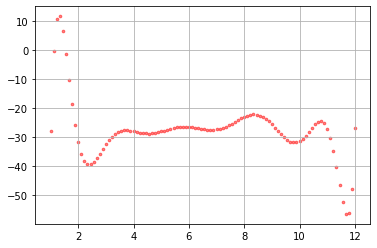

In [1]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import math
df = pd.read_csv('chita.csv',delimiter=';')
print(df)
df = df.stack().str.replace(',','.').unstack()
def lagranz(x,y,t):
    z=0
    for j in range(len(y)):
        p1=1; p2=1
        for i in range(len(x)):
            if i==j:
                p1=p1*1; p2=p2*1
            else:
                p1=p1*(t-x[i])
                p2=p2*(x[j]-x[i])
        z=z+y[j]*p1/p2
    return z
df.head()
index = df.index
columns = df.columns
values = df.values
index_list = df.index.tolist()
columns_list = df.columns.tolist()
values_list = df.values.tolist()
#print(values_list)
y=np.array(df['jan'][1:13])

a=[]
for item in y:
    if float(item) == 999.9:
        continue
    a.append(float(item))
x=np.array(np.linspace(1,len(a),len(a)))

#print(x)
#print(a)
xnew=np.linspace(np.min(x),np.max(x),100)
ynew=[lagranz(x,a,i) for i in xnew]
plt.scatter(xnew,ynew,s=7, c='red', marker="o", alpha = 0.5)
plt.grid(True)
plt.show()




[1. 2. 3. 4. 5. 6.] [-27.7 -31.6 -32.4 -28.  -28.  -26.4]
[-27.7, -27.487911475, -27.5369472, -27.789285925, -28.193190400000002, -28.702734375000006, -29.277529600000005, -29.882452825000005, -30.487372800000006, -31.066877275000007, -31.600000000000005, -32.069947725000006, -32.463827200000004, -32.772372175, -32.9896704, -33.112890625, -33.1420096, -33.079539075, -32.9302528, -32.700913525, -32.39999999999999, -32.03743397499999, -31.62430719999999, -31.17260842499999, -30.69495039999999, -30.204296874999986, -29.713689599999988, -29.235975324999988, -28.78353279999999, -28.367999774999987, -27.99999999999999, -27.68887022499999, -27.442387199999995, -27.266494674999997, -27.1650304, -27.139453125, -27.188569600000005, -27.308261575000007, -27.491212800000007, -27.72663602500001, -28.00000000000001, -28.29275647500001, -28.58206720000001, -28.84053092500001, -29.035910400000002, -29.130859375000004, -29.0826496, -28.842897824999984, -28.357292799999982, -27.565322274999968, -26.3999

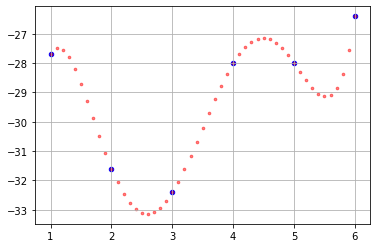

In [2]:
data = a[0:6]
#print(data)
def nuton(y,l,x):
    p = y[0]
    mnoj = 1
    for i in range(6):
        mnoj *= x-i
        p += l[i]*mnoj
    return p

def rr1(l):
    ans = []
    for i,x in enumerate(l[:-1]):
        ans.append(l[i]-l[i+1])
    return ans
l = []
ans = []

import numpy as np
for x in range(6):
    l.append(a[x])
for x in range(6):
    ans.append(l)
    l = rr1(l)
#for x in ans:
 #   print(x)
x1=np.array([1,2,3,4,5,6], dtype=float)
y1=np.array(ans[0][:len(ans[0])], dtype=float)
xn=np.arange(np.min(x1),np.max(x1)+0.1,0.1)
def _poly_newton_coefficient(x, y):
    m = len(x)

    x = np.copy(x)
    a = np.copy(y)
    for k in range(1, m):
        a[k:m] = (a[k:m] - a[k - 1])/(x[k:m] - x[k - 1])

    return a

#coef = _poly_newton_coefficient([1,2,3,4,5,6],[-10.9, -5.5, -9.6, -8.7, -11.3, -13.4])

def newton_polynomial(x_data, y_data, x):
    a = _poly_newton_coefficient(x_data, y_data)
    n = len(x_data) - 1  # Degree of polynomial
    p = a[n]

    for k in range(1,n+1):
        p = a[n-k] + (x - x_data[n-k])*p
    return p
print(x1,y1)

#print(coef)
plt.scatter(x1,y1,s=20, c='blue', marker="o")


yn=[newton_polynomial(x1,y1,i) for i in xn]
print(yn)
plt.scatter(xn,yn,s=7, c='red', marker="o", alpha = 0.5)
plt.grid(True)
plt.show()


[0.         0.06283185 0.12566371 0.18849556 0.25132741 0.31415927
 0.37699112 0.43982297 0.50265482 0.56548668 0.62831853 0.69115038
 0.75398224 0.81681409 0.87964594 0.9424778  1.00530965 1.0681415
 1.13097336 1.19380521 1.25663706 1.31946891 1.38230077 1.44513262
 1.50796447 1.57079633 1.63362818 1.69646003 1.75929189 1.82212374
 1.88495559 1.94778745 2.0106193  2.07345115 2.136283   2.19911486
 2.26194671 2.32477856 2.38761042 2.45044227 2.51327412 2.57610598
 2.63893783 2.70176968 2.76460154 2.82743339 2.89026524 2.95309709
 3.01592895 3.0787608  3.14159265 3.20442451 3.26725636 3.33008821
 3.39292007 3.45575192 3.51858377 3.58141563 3.64424748 3.70707933
 3.76991118 3.83274304 3.89557489 3.95840674 4.0212386  4.08407045
 4.1469023  4.20973416 4.27256601 4.33539786 4.39822972 4.46106157
 4.52389342 4.58672527 4.64955713 4.71238898 4.77522083 4.83805269
 4.90088454 4.96371639 5.02654825 5.0893801  5.15221195 5.2150438
 5.27787566 5.34070751 5.40353936 5.46637122 5.52920307 5.592034

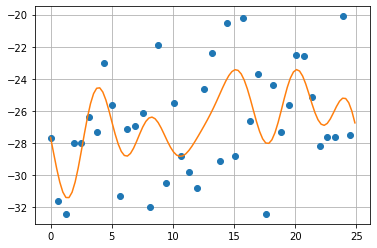

In [3]:
t=np.array(df['jan'])

nt=[]
for item in t:
    if float(item) == 999.9:
        continue
    nt.append(float(item))
num = 40
kef = int(num*2.5)
xt=np.array(np.linspace(1,len(nt),len(nt)))
xArr = np.zeros((num), dtype=float)
yArr = np.zeros((num), dtype=float)
new_xArr = np.zeros((kef), dtype=float)
for i in range(num):
    xArr[i] = i * 2 * math.pi / 10
    yArr[i] = nt[i]

for i in range(kef):
    new_xArr[i] = i * 2 * math.pi / kef

#print(xArr)
#print(yArr)
print(new_xArr)


def getA0(yArr):
    a0 = 0
    for i in range(num):
        a0 -= yArr[i] / num
    return a0

def getAk(power, yArr):
    ak = np.zeros((power + 1), dtype=float)
    for k in range(power + 1):
        s = 0
        for i in range(num):
            s += yArr[i] * math.cos(k * 2 * math.pi * i / (num))
        ak[k] = (2 / (num)) * s
    return ak

def getBk(power, yArr):
    bk = np.zeros((power + 1), dtype=float)
    for k in range(power + 1):
        s = 0
        for i in range(num):
            s += yArr[i] * math.sin(k * 2 * math.pi * i / (num))
        bk[k] = (2 / (num)) * s
    return bk


def getFourier(power, xArr, yArr):
    polinom = np.zeros((kef), dtype=float)
    a0 = getA0(yArr)
    ak = getAk(power, yArr)
    bk = getBk(power, yArr)
    for i in range(kef):
        polinom[i] = a0
        for j in range(power + 1):
            polinom[i] += (ak[j] * math.cos((j) * xArr[i]) + bk[j] * math.sin((j) * xArr[i]))
    return polinom


Fourier = getFourier(6, new_xArr, yArr)
print(Fourier)

plt.grid()
plt.plot(xArr, yArr, 'o', new_xArr * int(num/10), Fourier)


plt.show()


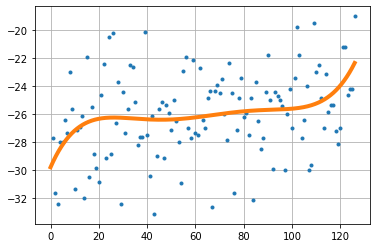

In [17]:
kek=nt
kek2=np.array(np.linspace(1,len(kek),len(kek)))

from numpy import linalg
p=5
A=np.zeros((p+1,p+1))
g=[0 for i in range(len(kek))]
for i in range(p+1):
    for j in range(p+1):
        for k in range(len(kek)):
            g[k]=k**(2*p-j-i)
        A[i,j]=sum(g)
B=np.zeros((p+1,1))
h=[0 for i in range(len(kek))]
for l in range(p+1):
    for r in range(len(kek)):
        h[r]=nt[r]*r**(p-l)
    B[l,0]=sum(h)
C=linalg.solve(A,B)
def fun(x):
    z=0
    for s in range(p+1):
        z=z+C[s]*x**(p-s)
    return z



xlist2= np.arange(0,len(kek),0.1)
ylist = [fun(x) for x in xlist2]
plt.grid (True)
plt.plot (kek2, kek, 'o', markersize=3)
plt.plot (xlist2,ylist, linewidth=4)
plt.show()